In [1]:
# Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
import pandas as pd
df= pd.read_csv('/content/data.csv',encoding = "ISO-8859-1", sep=',',
                  names=["sentiment", "text","user"])
df = df.iloc[1:]
df.head(3)

,sentiment,text,user
1,positive,RT @HarbRimah: Huge Demand on Data Science and...,100DaysOfMLCode
2,neutral,RT @bradleyvoytek: Thinking about a PhD? I'm h...,schoolingadream
3,positive,Hot High Tech Jobs in Israel available 24/7\nA...,YuvalLeshem


In [11]:
# converting all Tweets to lower case
df['text'] = df.apply(lambda x: x['text'].lower(), axis=1)

In [12]:
df.head(10)

,sentiment,text,user
1,positive,rt @harbrimah: huge demand on data science and...,100DaysOfMLCode
2,neutral,rt @bradleyvoytek: thinking about a phd? i'm h...,schoolingadream
3,positive,hot high tech jobs in israel available 24/7\na...,YuvalLeshem
4,neutral,"rt @udemy_coupons1: python for data analysis, ...",xaelbot
5,neutral,"rt @udemy_coupons1: python for data analysis, ...",SueFinTech
6,neutral,@connieschultz @jaquebelle cancel thanksgiving...,DHartung13
7,negative,@benshapiro this is science. kids spread asymp...,DrnBusiness
8,positive,rt @greg_asner: my people are everywhere in 4d...,asnerlab
9,negative,we are committed to; \n\n â equipping young p...,EdoHub
10,neutral,the data (science) is in: metisâs jason moss...,StartupInfos


In [13]:
# remove usernames from 'text' column in Dataframe
import numpy as np
import re

def remove_username_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

df['text'] = np.vectorize(remove_username_pattern)(df['text'], "@[\w]*") 
df.head(10)

,sentiment,text,user
1,positive,rt : huge demand on data science and machine-l...,100DaysOfMLCode
2,neutral,rt : thinking about a phd? i'm hosting a phd a...,schoolingadream
3,positive,hot high tech jobs in israel available 24/7\na...,YuvalLeshem
4,neutral,"rt : python for data analysis, data science &a...",xaelbot
5,neutral,"rt : python for data analysis, data science &a...",SueFinTech
6,neutral,cancel thanksgiving gatherings? but my in-la...,DHartung13
7,negative,this is science. kids spread asymptomatic and...,DrnBusiness
8,positive,rt : my people are everywhere in 4d. satellit...,asnerlab
9,negative,we are committed to; \n\n â equipping young p...,EdoHub
10,neutral,the data (science) is in: metisâs jason moss...,StartupInfos


In [15]:
# Create a function to clean the texts
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('rt[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df.head(10)

,sentiment,text,user
1,positive,: huge demand on data science and machine-lear...,100DaysOfMLCode
2,neutral,: thinking about a phd? i'm hosting a phd app ...,schoolingadream
3,positive,hot high tech jobs in israel available 24/7\na...,YuvalLeshem
4,neutral,": python for data analysis, data science &amp;...",xaelbot
5,neutral,": python for data analysis, data science &amp;...",SueFinTech
6,neutral,cancel thanksgiving gatherings? but my in-la...,DHartung13
7,negative,this is science. kids spread asymptomatic and...,DrnBusiness
8,positive,": my people are everywhere in 4d. satellites,...",asnerlab
9,negative,we are committed to; \n\n â equipping young p...,EdoHub
10,neutral,the data (science) is in: metisâs jason moss...,StartupInfos


In [17]:
# remove stopwords from text
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text,user
1,positive,: huge demand data science machine-learning pl...,100DaysOfMLCode
2,neutral,: thinking phd? i'm hosting phd app q&amp;a co...,schoolingadream
3,positive,hot high tech jobs israel available 24/7\narch...,YuvalLeshem
4,neutral,": python data analysis, data science &amp; ml ...",xaelbot
5,neutral,": python data analysis, data science &amp; ml ...",SueFinTech
6,neutral,cancel thanksgiving gatherings? in-laws die go...,DHartung13
7,negative,science. kids spread asymptomatic bring adults...,DrnBusiness
8,positive,": people everywhere 4d. satellites, airborne, ...",asnerlab
9,negative,committed to; \n\n â equipping young people h...,EdoHub
10,neutral,data (science) in: metisâs jason moss discus...,StartupInfos


In [19]:
# remove punctations 'text' column in Dataframe    
df['text'] = df['text'].str.replace(r'[^\w\d\s\']+','')
df.head(10)

,sentiment,text,user
1,positive,huge demand data science machinelearning plat...,100DaysOfMLCode
2,neutral,thinking phd i'm hosting phd app qampa cog sc...,schoolingadream
3,positive,hot high tech jobs israel available 247narchit...,YuvalLeshem
4,neutral,python data analysis data science amp ml pand...,xaelbot
5,neutral,python data analysis data science amp ml pand...,SueFinTech
6,neutral,cancel thanksgiving gatherings inlaws die go t...,DHartung13
7,negative,science kids spread asymptomatic bring adults ...,DrnBusiness
8,positive,people everywhere 4d satellites airborne fiel...,asnerlab
9,negative,committed to nn â equipping young people high ...,EdoHub
10,neutral,data science in metisâs jason moss discusses d...,StartupInfos


In [20]:
# shuffle dataframe
from sklearn.utils import shuffle
df = shuffle(df)

df.head(10)

,sentiment,text,user
98,positive,slides pydataglobal2020 presentation released...,pydatait
9,negative,committed to nn â equipping young people high ...,EdoHub
37,neutral,courses like political science sociology scra...,Adeeronke
72,neutral,yo responsibility decimation economy lâ,WhackAsCrack
75,neutral,out preprint rð 'netfacs using network scienc...,BKnakker
81,neutral,python data analysis data science amp ml pand...,CodeGnuts
59,positive,ðððthe worldâs biggest crisis getting show l...,Quicktake
65,neutral,climate science joke one predictions correct h...,akhenateniv
2,neutral,thinking phd i'm hosting phd app qampa cog sc...,schoolingadream
88,positive,ðððthe worldâs biggest crisis getting show l...,AkshatRathi


In [25]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,sentiment,text,user,Subjectivity,Polarity
98,positive,slides pydataglobal2020 presentation released...,pydatait,0.500000,0.136364
9,negative,committed to nn â equipping young people high ...,EdoHub,0.646667,-0.113333
37,neutral,courses like political science sociology scra...,Adeeronke,0.100000,0.000000
72,neutral,yo responsibility decimation economy lâ,WhackAsCrack,0.000000,0.000000
75,neutral,out preprint rð 'netfacs using network scienc...,BKnakker,0.000000,0.000000
...,...,...,...,...,...
6,neutral,cancel thanksgiving gatherings inlaws die go t...,DHartung13,0.000000,0.000000
89,negative,unfortunate habit stem people believing save ...,goosetornado,0.603175,-0.357143
5,neutral,python data analysis data science amp ml pand...,SueFinTech,0.000000,0.000000
25,neutral,technology developing rapidly thought science...,"\"" prediâ¦""",0.000000,0.000000


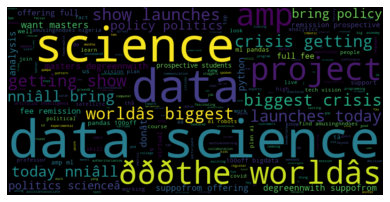

In [26]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

df['sentiment'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,sentiment,text,user,Subjectivity,Polarity
98,positive,slides pydataglobal2020 presentation released...,pydatait,0.500000,0.136364
9,negative,committed to nn â equipping young people high ...,EdoHub,0.646667,-0.113333
37,neutral,courses like political science sociology scra...,Adeeronke,0.100000,0.000000
72,neutral,yo responsibility decimation economy lâ,WhackAsCrack,0.000000,0.000000
75,neutral,out preprint rð 'netfacs using network scienc...,BKnakker,0.000000,0.000000
...,...,...,...,...,...
6,neutral,cancel thanksgiving gatherings inlaws die go t...,DHartung13,0.000000,0.000000
89,negative,unfortunate habit stem people believing save ...,goosetornado,0.603175,-0.357143
5,neutral,python data analysis data science amp ml pand...,SueFinTech,0.000000,0.000000
25,neutral,technology developing rapidly thought science...,"\"" prediâ¦""",0.000000,0.000000


In [43]:

df.tail(3)

,sentiment,text,user,Subjectivity,Polarity
98,positive,slides pydataglobal2020 presentation released...,pydatait,0.5,0.136364
99,neutral,ðððthe worldâs biggest crisis getting show la...,annmarie,0.0,0.000000
100,positive,looking 2021 beyond goals better serve custom...,BRNAgNews_RB,0.5,0.500000


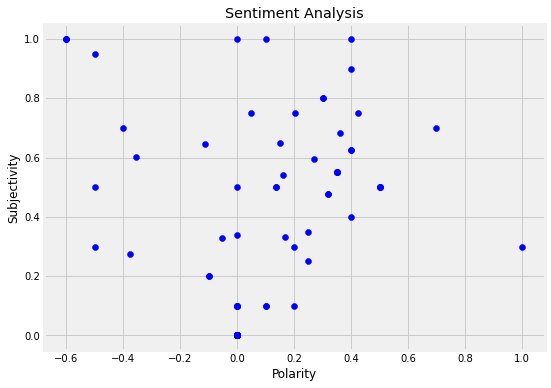

In [44]:
#Plotting the polarity and subjectivity as a scatter plot

# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(1, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [45]:
# Print the percentage of positive texts
ptexts = df[df.sentiment == 'positive']
ptexts = ptexts['text']
ptexts

round( (ptexts.shape[0] / df.shape[0]) * 100 , 1)

38.0

In [46]:
# Print the percentage of negative texts
ptexts = df[df.sentiment == 'negative']
ptexts = ptexts['text']
ptexts

round( (ptexts.shape[0] / df.shape[0]) * 100 , 1)

13.0

In [47]:
# Print the percentage of neutral texts
ptexts = df[df.sentiment == 'neutral']
ptexts = ptexts['text']
ptexts

round( (ptexts.shape[0] / df.shape[0]) * 100 , 1)

49.0

In [48]:
# Show the value counts
df['sentiment'].value_counts()

neutral     49
positive    38
negative    13
Name: sentiment, dtype: int64

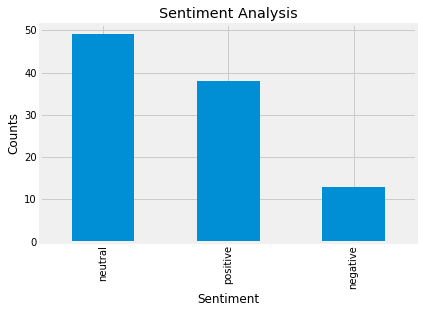

In [49]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()